In [6]:
!pip install -q feature-engine
!pip install -q feature_engine
!pip install --upgrade -q scikit-learn imbalanced-learn


ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\Pichau\\AppData\\Local\\Temp\\pip-uninstall-k36iypfq\\numpy\\_core\\_multiarray_umath.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
!pip install numpy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.2.0 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.2.0 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.


In [1]:
!pip install -q streamlit 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

c:\Users\Pichau\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**Dicionário de dados**

- **date (datetime64)**: Data e hora em que as medições foram registradas.  
- **temperature (int64)**: Temperatura registrada em graus Celsius.  
- **humidity (int64)**: Percentual de umidade no ambiente.  
- **water_level (int64)**: Nível de água como uma porcentagem.  
- **N (int64)**: Nível de nitrogênio no solo, escalado de 0 a 255.  
- **P (int64)**: Nível de fósforo no solo, escalado de 0 a 255.  
- **K (int64)**: Nível de potássio no solo, escalado de 0 a 255.  
- **Fan_actuator_OFF (float64)**: Indicador do atuador do ventilador se está desligado (0 ou 1).  
- **Fan_actuator_ON (float64)**: Indicador do atuador do ventilador se está ligado (0 ou 1).  
- **Watering_plant_pump_OFF (float64)**: Indicador da bomba de irrigação de plantas se está desligada (0 ou 1).  
- **Watering_plant_pump_ON (float64)**: Indicador da bomba de irrigação de plantas se está ligada (0 ou 1).  
- **Water_pump_actuator_OFF (float64)**: Indicador do atuador da bomba de água se está desligado (0 ou 1).  
- **Water_pump_actuator_ON (float64)**: Indicador do atuador da bomba de água se está ligado (0 ou 1).  

In [3]:
df_irrigation = pd.read_csv('IoTProcessed_Data.csv', sep=',')
df_irrigation.head()

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


## Preprocessing

In [4]:
df_irrigation.shape

(37922, 13)

In [5]:
df_irrigation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     37920 non-null  object 
 1   tempreature              37922 non-null  int64  
 2   humidity                 37922 non-null  int64  
 3   water_level              37922 non-null  int64  
 4   N                        37922 non-null  int64  
 5   P                        37922 non-null  int64  
 6   K                        37922 non-null  int64  
 7   Fan_actuator_OFF         37922 non-null  float64
 8   Fan_actuator_ON          37922 non-null  float64
 9   Watering_plant_pump_OFF  37922 non-null  float64
 10  Watering_plant_pump_ON   37922 non-null  float64
 11  Water_pump_actuator_OFF  37922 non-null  float64
 12  Water_pump_actuator_ON   37922 non-null  float64
dtypes: float64(6), int64(6), object(1)
memory usage: 3.8+ MB


In [6]:
df_irrigation.describe()

,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
count,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000,37922.000000
mean,18.760113,50.329308,79.401587,231.963610,234.123332,225.171879,0.689863,0.310137,0.762091,0.237909,0.774142,0.225858
std,7.143422,22.995645,36.824610,34.718121,31.452138,44.877635,0.462555,0.462555,0.425809,0.425809,0.418152,0.418152
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,49.000000,79.000000,185.000000,190.000000,160.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,17.000000,59.000000,100.000000,255.000000,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,25.000000,62.000000,100.000000,255.000000,255.000000,255.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,41.000000,100.000000,100.000000,255.000000,255.000000,259.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Verificando nulos**

In [7]:
def nulls(df):
    """
    Calcula a quantidade de valores nulos em cada coluna de um DataFrame
    e retorna um DataFrame estilizado destacando colunas com nulos.

    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.

    Retorna:
        pd.DataFrame ou Styler: Um DataFrame com a contagem de valores nulos por coluna,
        estilizado com destaque para colunas que possuem valores nulos.
    """
    # Calcula a contagem de valores nulos por coluna
    df_null = df.isnull().sum().to_frame(name="Valores Nulos")
    
    # Adiciona a porcentagem de nulos em relação ao total de linhas
    df_null["% Nulos"] = (df_null["Valores Nulos"] / len(df)) * 100

    # Função para destacar células com nulos
    def destacar_nulos(val):
        color = "lightcoral" if val > 0 else ""
        return f"background-color: {color}"
    
    # Retorna o DataFrame estilizado
    return df_null.style.applymap(destacar_nulos, subset=["% Nulos"])


In [8]:
df_null = nulls(df_irrigation)
df_null

,Valores Nulos,% Nulos
date,2,0.005274
tempreature,0,0.000000
humidity,0,0.000000
water_level,0,0.000000
N,0,0.000000
P,0,0.000000
K,0,0.000000
Fan_actuator_OFF,0,0.000000
Fan_actuator_ON,0,0.000000
Watering_plant_pump_OFF,0,0.000000


In [9]:
import pandas as pd

# Filtrar as linhas onde a coluna 'date' é nula
null_rows = df_irrigation[df_irrigation['date'].isna()]
null_rows

,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
14349,NaN,20,45,86,255,255,255,1.0,0.0,0.0,1.0,1.0,0.0
14350,NaN,20,45,67,255,255,255,1.0,0.0,0.0,1.0,0.0,1.0


In [10]:
import pandas as pd

# Filtrar as linhas onde a coluna 'date' é nula
null_rows = df_irrigation[df_irrigation['date'].isna()]

# Visualizar 3 linhas anteriores e 3 linhas posteriores para cada linha nula
for index in null_rows.index:
    print(f"Visualizando dados ao redor do índice {index} (nulo):\n")
    display(df_irrigation.iloc[max(0, index - 3):index + 4])  # Mostrar 3 antes e 3 depois (index + 1 já está incluso)
    print("-" * 50)

Visualizando dados ao redor do índice 14349 (nulo):



,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
14346,2024-01-05 01:20:00,20,69,100,178,186,157,1.0,0.0,1.0,0.0,1.0,0.0
14347,2024-01-05 01:25:00,20,68,78,178,186,157,1.0,0.0,1.0,0.0,1.0,0.0
14348,2024-01-05 01:30:00,20,67,100,178,186,157,1.0,0.0,1.0,0.0,1.0,0.0
14349,NaN,20,45,86,255,255,255,1.0,0.0,0.0,1.0,1.0,0.0
14350,NaN,20,45,67,255,255,255,1.0,0.0,0.0,1.0,0.0,1.0
14351,2024-01-05 01:48:00,20,50,81,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
14352,2024-01-05 01:53:00,20,57,94,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0


--------------------------------------------------
Visualizando dados ao redor do índice 14350 (nulo):



,date,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
14347,2024-01-05 01:25:00,20,68,78,178,186,157,1.0,0.0,1.0,0.0,1.0,0.0
14348,2024-01-05 01:30:00,20,67,100,178,186,157,1.0,0.0,1.0,0.0,1.0,0.0
14349,NaN,20,45,86,255,255,255,1.0,0.0,0.0,1.0,1.0,0.0
14350,NaN,20,45,67,255,255,255,1.0,0.0,0.0,1.0,0.0,1.0
14351,2024-01-05 01:48:00,20,50,81,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
14352,2024-01-05 01:53:00,20,57,94,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
14353,2024-01-05 01:58:00,20,58,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0


--------------------------------------------------


In [ ]:
# O parâmetro errors='coerce' na função pd.to_datetime() do pandas é usado para lidar com valores que não podem ser 
# convertidos para o formato de data e hora (datetime64[ns]).

In [11]:
# Converter a coluna 'date' para o formato datetime
df_irrigation['date'] = pd.to_datetime(df_irrigation['date'], errors='coerce')


In [12]:
df_irrigation['date']

0       2024-02-08 06:10:00
1       2024-02-08 06:15:00
2       2024-02-08 06:20:00
3       2024-02-08 06:05:00
4       2024-02-08 06:00:00
                ...        
37917   2024-02-02 22:20:00
37918   2024-02-02 22:25:00
37919   2024-02-02 22:30:00
37920   2024-02-02 22:35:00
37921   2024-02-02 22:40:00
Name: date, Length: 37922, dtype: datetime64[ns]

In [13]:
# Formatar para hora:minuto:segundo (%H:%M:%S)
df_irrigation['date_time'] = df_irrigation['date'].dt.strftime('%H:%M:%S')
df_irrigation['date_time']

0        06:10:00
1        06:15:00
2        06:20:00
3        06:05:00
4        06:00:00
           ...   
37917    22:20:00
37918    22:25:00
37919    22:30:00
37920    22:35:00
37921    22:40:00
Name: date_time, Length: 37922, dtype: object

In [14]:
def calcular_frequencia(df, coluna):
    """
    Calcula a frequência dos registros na coluna de data e retorna as diferenças entre linhas consecutivas.
    
    Parâmetros:
        df (pd.DataFrame): DataFrame com os dados.
        coluna (str): Nome da coluna contendo os registros de data.
    
    Retorna:
       list: lista com as frequencias das 10 primeiras linhas e o valor médio das diferenças 
    """
    # Garantir que a coluna seja do tipo datetime
    df[coluna] = pd.to_datetime(df[coluna], errors='coerce')
    
    # Calcula as diferenças entre linhas consecutivas (linha posterior - linha atual)
    # Calcula a diferença de tempo (timedelta) entre as linhas consecutivas
    diferencas = df[coluna].diff().iloc[1:11]
    
    # Calcular a frequência das diferenças (como intervalo de tempo) em segundos
    frequencia_abs = diferencas.dt.total_seconds().tolist()
    frequencia_abs = [x/60 for x in frequencia_abs] 
    # Calcular a média da frequência em segundos
    frequencia_media = np.mean(frequencia_abs)
    
    serie = pd.Series(frequencia_abs)
    
    frequencia = serie.mode().values[0]
    
    
    return frequencia_abs, frequencia_media, frequencia

In [15]:
frequencia_abs, frequencia_media, frequencia=calcular_frequencia(df_irrigation, 'date')
print ("Frequencia absoluta(min):", frequencia_abs)
print("Frequencia media(min):", frequencia_media)
print("Frequencia (min):", frequencia)

Frequencia absoluta(min): [5.0, 5.0, -15.0, -5.0, -30238.0, 5.0, 5.0, -70.0, 5.0, 5.0]
Frequencia media(min): -3029.8
Frequencia (min): 5.0


In [16]:
df_irrigation.columns

Index(['date', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON', 'date_time'],
      dtype='object')

In [17]:
df_irrigation = df_irrigation[['date', 'date_time', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON']]
df_irrigation.head()

,date,date_time,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0


In [18]:
import pandas as pd

# Filtrar as linhas onde a coluna 'date' é nula
null_rows = df_irrigation[df_irrigation['date'].isna()]
null_rows


,date,date_time,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
14349,NaT,NaN,20,45,86,255,255,255,1.0,0.0,0.0,1.0,1.0,0.0
14350,NaT,NaN,20,45,67,255,255,255,1.0,0.0,0.0,1.0,0.0,1.0


In [19]:
import pandas as pd

def substituir_tempo_faltante(df, coluna_data='date', coluna_min='date_time'):
    """
    Substitui valores de tempo faltantes (NaT) em uma coluna com base na moda das 10 primeiras linhas
    e atualiza tanto a coluna de data quanto a coluna de tempo.

    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo a coluna de tempo com valores nulos.
        coluna_data (str): O nome da coluna de data para substituir os valores nulos. Padrão é 'date'.
        coluna_min (str): O nome da coluna de tempo para substituir os valores nulos. Padrão é 'date_time'.
    
    Retorna:
        pd.DataFrame: O DataFrame com os valores nulos substituídos.
    """
    
    # Garantir que a coluna de data seja do tipo datetime
    df[coluna_data] = pd.to_datetime(df[coluna_data], errors='coerce')
    
    # Verificar se há valores NaT e NaN
    print("Valores NaT na coluna de data antes da substituição:", df[coluna_data].isna().sum())
    
    # Calcular a moda das 10 primeiras linhas da coluna de data
    diferencas = df[coluna_data].diff().iloc[1:11]
    
    # Calcular a frequência das diferenças (como intervalo de tempo) em segundos
    frequencia_abs = diferencas
    serie = pd.Series(frequencia_abs)
    
    # Calcular a moda e converter para segundos
    moda = serie.mode().values[0]
    moda_segundos = moda / pd.Timedelta(seconds=1)  # Converter para segundos
    print(f"Moda calculada: {moda_segundos} segundos")
    
    # Iterar sobre as linhas do DataFrame
    for i in range(1, len(df)-1):  # Começar do 1 para garantir que existe um valor anterior
        if pd.isnull(df[coluna_data].iloc[i]):
            # Obter o valor anterior e o posterior
            anterior = df[coluna_data].iloc[i-1]
            posterior = df[coluna_data].iloc[i+1]
            print(f"Índice {i}: Anterior = {anterior}, Posterior = {posterior}")
            
            if pd.notnull(anterior) and pd.notnull(posterior):
                # Calcular a diferença entre o valor anterior e posterior
                diff = (posterior - anterior).total_seconds()
                
                print(f"Índice {i}: Diferença entre anterior e posterior: {diff} segundos")
                
                # Se a diferença for 2 vezes a moda, somamos a moda ao valor anterior
                if diff >= 2 * moda_segundos:  # Convertendo a moda para segundos
                    print('Substituindo com moda')
                    df.loc[i, coluna_data] = anterior + pd.Timedelta(seconds=moda_segundos)
                    
                else:
                    # Caso contrário, adicionamos metade da diferença entre o anterior e posterior
                    print('Substituindo com metade da diferença')
                    df.loc[i, coluna_data] = anterior + pd.Timedelta(seconds=diff / 2)
                    
            elif pd.notnull(anterior) and pd.isnull(posterior):
                # Se o valor posterior for NaT, somar a moda ao valor anterior
                print('Substituindo com moda devido ao NaT no posterior')
                df.loc[i, coluna_data] = anterior + pd.Timedelta(seconds=moda_segundos)
            
            # Atualizar a coluna de tempo (coluna_min) com o mesmo valor da coluna de data ajustada
            df.loc[i, coluna_min] = df.loc[i, coluna_data].strftime('%H:%M:%S')  # Usar diretamente o strftime

    # Verificar os valores após a substituição
    print("Valores NaT na coluna de data após a substituição:", df[coluna_data].isna().sum())
    
    return df


In [20]:
df_irrigation_ = df_irrigation.copy()

In [21]:
df_irrigation_= substituir_tempo_faltante(df_irrigation_, coluna_data='date', coluna_min='date_time')

Valores NaT na coluna de data antes da substituição: 2
Moda calculada: 300.0 segundos
Índice 14349: Anterior = 2024-01-05 01:30:00, Posterior = NaT
Substituindo com moda devido ao NaT no posterior
Índice 14350: Anterior = 2024-01-05 01:35:00, Posterior = 2024-01-05 01:48:00
Índice 14350: Diferença entre anterior e posterior: 780.0 segundos
Substituindo com moda
Valores NaT na coluna de data após a substituição: 0


In [22]:
df_irrigation_

,date,date_time,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,06:10:00,41,63,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,06:15:00,41,59,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,06:20:00,41,62,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,06:05:00,40,60,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,06:00:00,39,61,100,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37917,2024-02-02 22:20:00,22:20:00,3,59,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37918,2024-02-02 22:25:00,22:25:00,3,60,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37919,2024-02-02 22:30:00,22:30:00,3,60,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37920,2024-02-02 22:35:00,22:35:00,3,59,100,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0


In [23]:
idx_faltante= [14349,14350, 14351, 14352]
df_irrigation_[df_irrigation_.index.isin(idx_faltante)]

,date,date_time,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
14349,2024-01-05 01:35:00,01:35:00,20,45,86,255,255,255,1.0,0.0,0.0,1.0,1.0,0.0
14350,2024-01-05 01:40:00,01:40:00,20,45,67,255,255,255,1.0,0.0,0.0,1.0,0.0,1.0
14351,2024-01-05 01:48:00,01:48:00,20,50,81,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
14352,2024-01-05 01:53:00,01:53:00,20,57,94,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0


In [24]:
df_irrigation=df_irrigation_

In [25]:
df_null = nulls(df_irrigation)
df_null

,Valores Nulos,% Nulos
date,0,0.000000
date_time,0,0.000000
tempreature,0,0.000000
humidity,0,0.000000
water_level,0,0.000000
N,0,0.000000
P,0,0.000000
K,0,0.000000
Fan_actuator_OFF,0,0.000000
Fan_actuator_ON,0,0.000000


**Verificando dados duplicados**

In [26]:
def duplicates(df):
    """
    Calcula a quantidade de linhas duplicadas em um DataFrame
    e retorna um DataFrame estilizado destacando duplicatas.

    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.

    Retorna:
        pd.DataFrame ou Styler: Um DataFrame com a contagem e porcentagem de linhas duplicadas,
        estilizado para destacar a presença de duplicatas.
    """
    # Calcula a quantidade de linhas duplicadas
    num_duplicates = df.duplicated().sum()
    percent_duplicates = (num_duplicates / len(df)) * 100

    # Cria um DataFrame com os resultados
    df_duplicates = pd.DataFrame(
        {
            "Linhas Duplicadas": [num_duplicates],
            "% Duplicadas": [percent_duplicates],
        }
    )

    # Função para destacar células com duplicatas
    def destacar(val):
        color = "lightcoral" if val > 0 else ""
        return f"background-color: {color}"

    # Retorna o DataFrame estilizado
    return df_duplicates.style.applymap(destacar)


In [27]:
df_duplicated =  duplicates(df_irrigation)
df_duplicated 

,Linhas Duplicadas,% Duplicadas
0,0,0.000000


**Outliers**

In [28]:
df_irrigation.columns

Index(['date', 'date_time', 'tempreature', 'humidity', 'water_level', 'N', 'P',
       'K', 'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

In [29]:
num_cols = ['tempreature', 'humidity', 'water_level', 'N', 'P', 'K']

In [30]:
df_irrigation_num=df_irrigation[num_cols]
df_irrigation_num

,tempreature,humidity,water_level,N,P,K
0,41,63,100,255,255,255
1,41,59,100,255,255,255
2,41,62,100,255,255,255
3,40,60,100,255,255,255
4,39,61,100,255,255,255
...,...,...,...,...,...,...
37917,3,59,100,255,255,255
37918,3,60,100,255,255,255
37919,3,60,100,255,255,255
37920,3,59,100,255,255,255


In [31]:
# Transformar o dataframe para formato longo (necessário para seaborn.boxplot)
df_long = df_irrigation_num.melt(var_name='Colunas', value_name='Valores')

Text(0, 0.5, 'Valores')

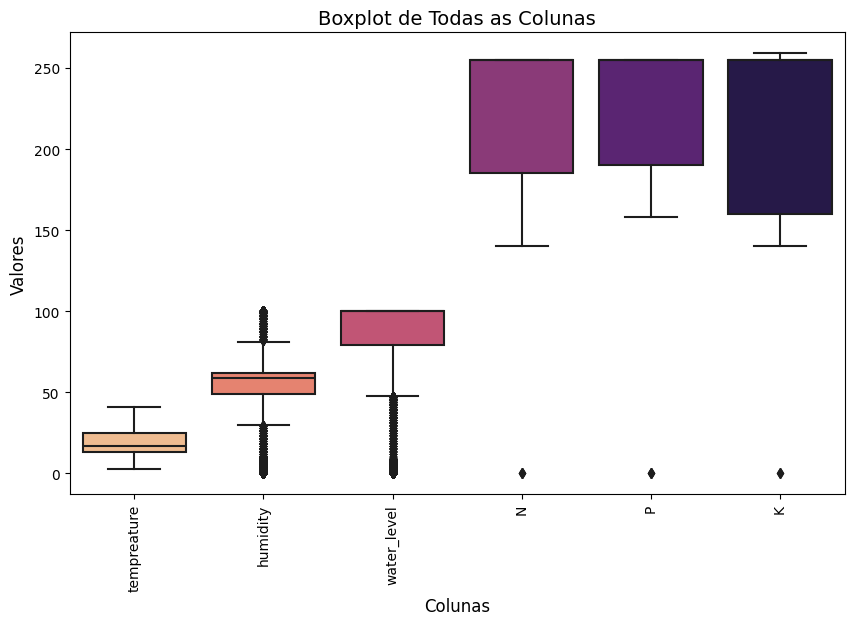

In [32]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico
sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')

# Configurar título e rótulos
plt.title('Boxplot de Todas as Colunas', fontsize=14)
plt.xlabel('Colunas', fontsize=12)
# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)
plt.ylabel('Valores', fontsize=12)

In [33]:
df_irrigation_log= np.log(df_irrigation_num + 0.01)
df_irrigation_log 

,tempreature,humidity,water_level,N,P,K
0,3.713816,4.143293,4.60527,5.541303,5.541303,5.541303
1,3.713816,4.077707,4.60527,5.541303,5.541303,5.541303
2,3.713816,4.127296,4.60527,5.541303,5.541303,5.541303
3,3.689129,4.094511,4.60527,5.541303,5.541303,5.541303
4,3.663818,4.111038,4.60527,5.541303,5.541303,5.541303
...,...,...,...,...,...,...
37917,1.101940,4.077707,4.60527,5.541303,5.541303,5.541303
37918,1.101940,4.094511,4.60527,5.541303,5.541303,5.541303
37919,1.101940,4.094511,4.60527,5.541303,5.541303,5.541303
37920,1.101940,4.077707,4.60527,5.541303,5.541303,5.541303


In [34]:
# Transformar o dataframe para formato longo (necessário para seaborn.boxplot)
df_long = df_irrigation_log.melt(var_name='Colunas', value_name='Valores')

Text(0, 0.5, 'Valores')

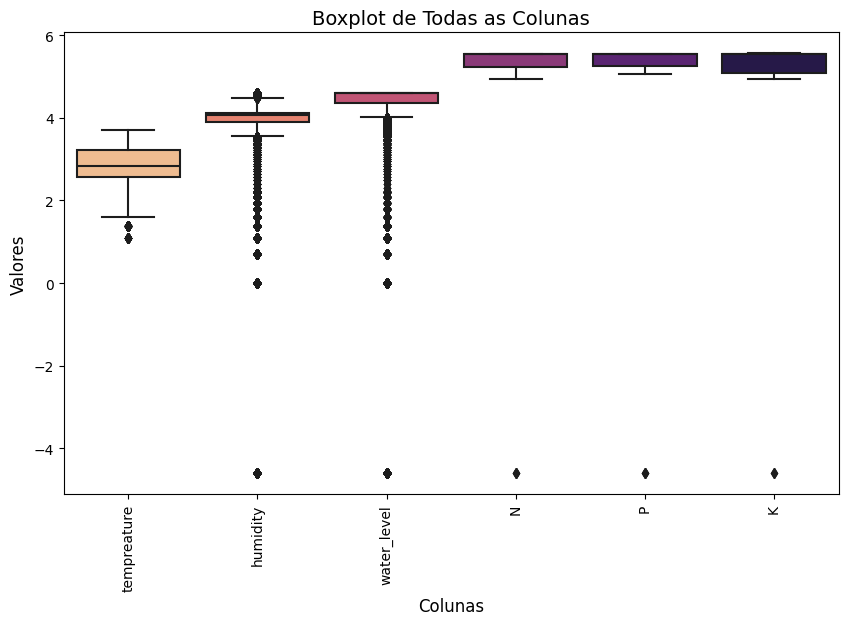

In [35]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico
sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')

# Configurar título e rótulos
plt.title('Boxplot de Todas as Colunas', fontsize=14)
plt.xlabel('Colunas', fontsize=12)
# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)
plt.ylabel('Valores', fontsize=12)

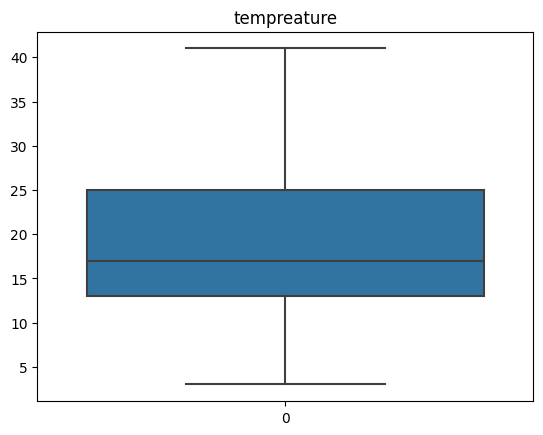

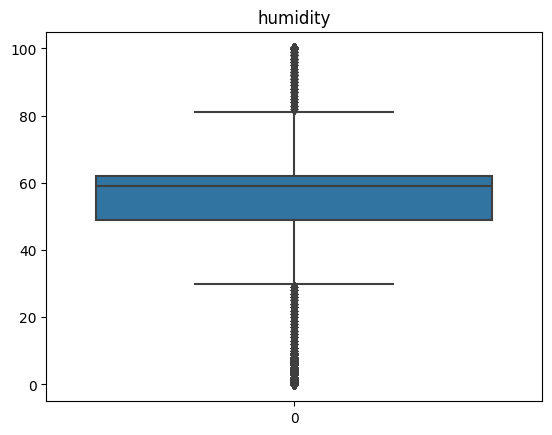

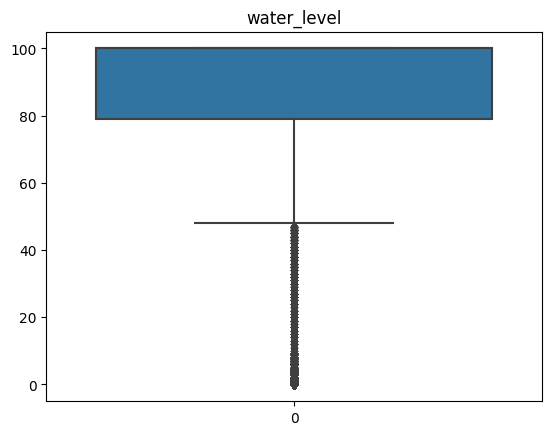

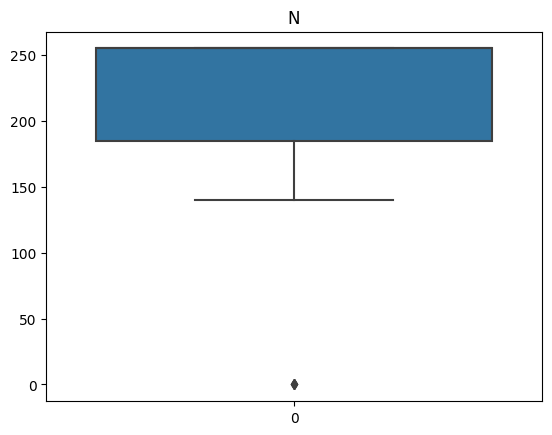

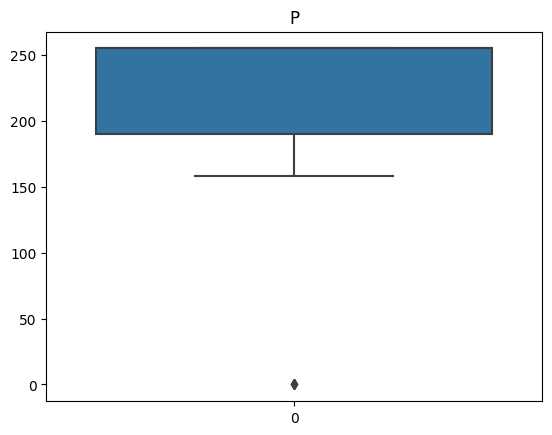

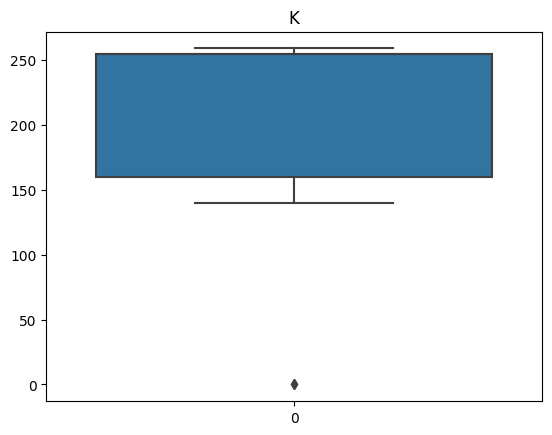

In [35]:
for column in df_irrigation_num:
    if type(df_irrigation_num[column][0])!=str:
        sns.boxplot(df_irrigation_num[column])
        plt.title(column)
        plt.show()

In [36]:
import pandas as pd

def calcular_outliers(df, style=False):
    """
    Calcula a contagem e o percentual de valores outliers em cada coluna numérica de um DataFrame.
    Adiciona uma opção para estilizar o DataFrame com destaque para valores na coluna "Outliers %" > 20.
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.
        style (bool): Se True, retorna o DataFrame estilizado. Default é False.
    
    Retorna:
        pd.DataFrame ou Styler: Um DataFrame com a contagem e o percentual de outliers por variável, 
        ou um Styler com destaque visual.
    """
    resultados = []
    total_linhas = len(df)
    
    for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular os limites
        q1 = df[coluna].quantile(0.25)
        q3 = df[coluna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Contar outliers
        count = ((df[coluna] < limite_inferior) | (df[coluna] > limite_superior)).sum()
        percent = (count / total_linhas) * 100
        
        # Adicionar resultados
        resultados.append({"Variável": coluna, "Outliers": count, "Outliers %": percent})
    
    # Criar DataFrame consolidado
    df_resultado = pd.DataFrame(resultados).set_index("Variável")
    
    if not style:
        return df_resultado
    else:
        # Estilo para valores maiores que 20% na coluna "Outliers %"
        def destacar_outliers(val):
            color = "lightcoral" if val > 20 else ""
            return f"background-color: {color}"
        
        return df_resultado.style.applymap(
            destacar_outliers, subset=["Outliers %"]
        )


In [37]:
df_outliers = calcular_outliers(df_irrigation_num, style=False)
df_outliers

,Outliers,Outliers %
Variável,,
tempreature,0,0.000000
humidity,7589,20.012130
water_level,7044,18.574970
N,3,0.007911
P,3,0.007911
K,2,0.005274


In [38]:
df_outliers = calcular_outliers(df_irrigation_num, style=True)
df_outliers

,Outliers,Outliers %
Variável,,
tempreature,0,0.000000
humidity,7589,20.012130
water_level,7044,18.574970
N,3,0.007911
P,3,0.007911
K,2,0.005274


In [39]:
def substituir_outliers(df):
    """
    Substitui os valores outliers das colunas numéricas de um DataFrame
    pelos valores máximos e mínimos baseados nos limites do boxplot (IQR).
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.
    
    Retorna:
        pd.DataFrame: O DataFrame com os outliers substituídos.
    """
    df_corrigido = df.copy()
    for coluna in df_corrigido.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular os limites
        q1 = df_corrigido[coluna].quantile(0.25)
        q3 = df_corrigido[coluna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Substituir outliers abaixo do limite inferior
        df_corrigido[coluna] = df_corrigido[coluna].apply(
            lambda x: limite_inferior if x < limite_inferior else limite_superior if x > limite_superior else x
        )
    return df_corrigido

In [40]:
import numpy as np
import pandas as pd
from statsmodels.imputation.mice import MICEData

def substituir_outliers_com_mice(df):
    """
    Substitui os valores outliers das colunas numéricas de um DataFrame por NaN
    e preenche os NaNs utilizando o método MICE (Multiple Imputation by Chained Equations).
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.
    
    Retorna:
        pd.DataFrame: O DataFrame com os outliers substituídos e preenchidos.
    """
    df_corrigido = df.copy()
    
    for coluna in df_corrigido.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular os limites
        q1 = df_corrigido[coluna].quantile(0.25)
        q3 = df_corrigido[coluna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Substituir outliers por NaN
        df_corrigido[coluna] = df_corrigido[coluna].apply(
            lambda x: np.nan if x < limite_inferior or x > limite_superior else x
        )
    
    # Aplicar MICE para preencher os NaNs
    mice_data = MICEData(df_corrigido)
    df_preenchido = mice_data.data  # Retorna o DataFrame preenchido
    
    return df_preenchido


In [ ]:
# Winsorizer: Trata outliers substituindo valores extremos com limites definidos.
# O Winsorizer da biblioteca Feature-engine é um transformador utilizado para tratar outliers em variáveis numéricas, 
# limitando os valores extremos a determinados limites. Ele reduz o impacto dos outliers no treinamento de modelos de 
# machine learning, ajustando os valores para dentro de uma faixa especificada.

In [41]:
from feature_engine.outliers import Winsorizer

# Configurando o Winsorizer para usar o método IQR
winsorizer = Winsorizer(
    capping_method='iqr',  # Método baseado em IQR
    tail='both',           # Trata ambos os extremos
    fold=1.5,              # Multiplicador do IQR
    variables=['humidity', 'water_level']  # Variável de interesse
)

# Aplicando o transformador
df_irrigation_num = winsorizer.fit_transform(df_irrigation_num)

df_outliers = calcular_outliers(df_irrigation_num, style=True)
df_outliers

,Outliers,Outliers %
Variável,,
tempreature,0,0.000000
humidity,0,0.000000
water_level,0,0.000000
N,3,0.007911
P,3,0.007911
K,2,0.005274


In [42]:
# Transformar o dataframe para formato longo (necessário para seaborn.boxplot)
df_long = df_irrigation_num.melt(var_name='Colunas', value_name='Valores')

Text(0, 0.5, 'Valores')

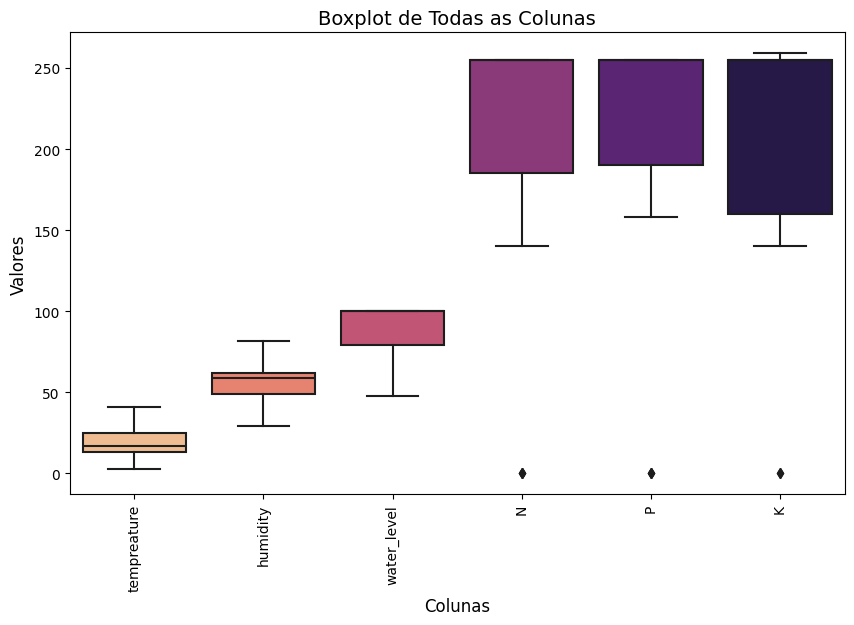

In [43]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico
sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')

# Configurar título e rótulos
plt.title('Boxplot de Todas as Colunas', fontsize=14)
plt.xlabel('Colunas', fontsize=12)
# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)
plt.ylabel('Valores', fontsize=12)

In [44]:
df_irrigation.columns

Index(['date', 'date_time', 'tempreature', 'humidity', 'water_level', 'N', 'P',
       'K', 'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

In [45]:
df_irrigation_categorical = df_irrigation[['Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON']]

df_irrigation_categorical

,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
37917,1.0,0.0,1.0,0.0,1.0,0.0
37918,1.0,0.0,1.0,0.0,1.0,0.0
37919,1.0,0.0,1.0,0.0,1.0,0.0
37920,1.0,0.0,1.0,0.0,1.0,0.0


In [46]:
df_irrigation_categorical = df_irrigation_categorical.astype('category')
df_irrigation_categorical

,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
37917,1.0,0.0,1.0,0.0,1.0,0.0
37918,1.0,0.0,1.0,0.0,1.0,0.0
37919,1.0,0.0,1.0,0.0,1.0,0.0
37920,1.0,0.0,1.0,0.0,1.0,0.0


In [47]:
df_irrigation_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Fan_actuator_OFF         37922 non-null  category
 1   Fan_actuator_ON          37922 non-null  category
 2   Watering_plant_pump_OFF  37922 non-null  category
 3   Watering_plant_pump_ON   37922 non-null  category
 4   Water_pump_actuator_OFF  37922 non-null  category
 5   Water_pump_actuator_ON   37922 non-null  category
dtypes: category(6)
memory usage: 223.1 KB


In [48]:
df_irrigation_ = df_irrigation_num.copy()
df_irrigation_[['Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON']] = df_irrigation_categorical[['Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON']]
       
df_irrigation_[['date', 'date_time']]=df_irrigation[['date', 'date_time']]
df_irrigation_= df_irrigation_[['date', 'date_time', 'tempreature', 'humidity', 'water_level', 'N', 'P', 'K',
       'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON']]

df_irrigation_

,date,date_time,tempreature,humidity,water_level,N,P,K,Fan_actuator_OFF,Fan_actuator_ON,Watering_plant_pump_OFF,Watering_plant_pump_ON,Water_pump_actuator_OFF,Water_pump_actuator_ON
0,2024-02-08 06:10:00,06:10:00,41,63.0,100.0,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
1,2024-02-08 06:15:00,06:15:00,41,59.0,100.0,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
2,2024-02-08 06:20:00,06:20:00,41,62.0,100.0,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
3,2024-02-08 06:05:00,06:05:00,40,60.0,100.0,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
4,2024-02-08 06:00:00,06:00:00,39,61.0,100.0,255,255,255,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37917,2024-02-02 22:20:00,22:20:00,3,59.0,100.0,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37918,2024-02-02 22:25:00,22:25:00,3,60.0,100.0,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37919,2024-02-02 22:30:00,22:30:00,3,60.0,100.0,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0
37920,2024-02-02 22:35:00,22:35:00,3,59.0,100.0,255,255,255,1.0,0.0,1.0,0.0,1.0,0.0


In [49]:
df_irrigation_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37922 entries, 0 to 37921
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     37922 non-null  datetime64[ns]
 1   date_time                37922 non-null  object        
 2   tempreature              37922 non-null  int64         
 3   humidity                 37922 non-null  float64       
 4   water_level              37922 non-null  float64       
 5   N                        37922 non-null  int64         
 6   P                        37922 non-null  int64         
 7   K                        37922 non-null  int64         
 8   Fan_actuator_OFF         37922 non-null  category      
 9   Fan_actuator_ON          37922 non-null  category      
 10  Watering_plant_pump_OFF  37922 non-null  category      
 11  Watering_plant_pump_ON   37922 non-null  category      
 12  Water_pump_actuator_OFF  37922 n

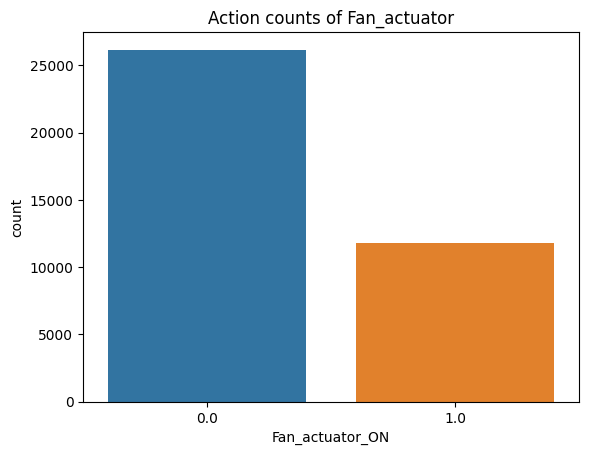

In [50]:
sns.countplot(x=df_irrigation_["Fan_actuator_ON"])
plt.title("Action counts of Fan_actuator")
plt.show()

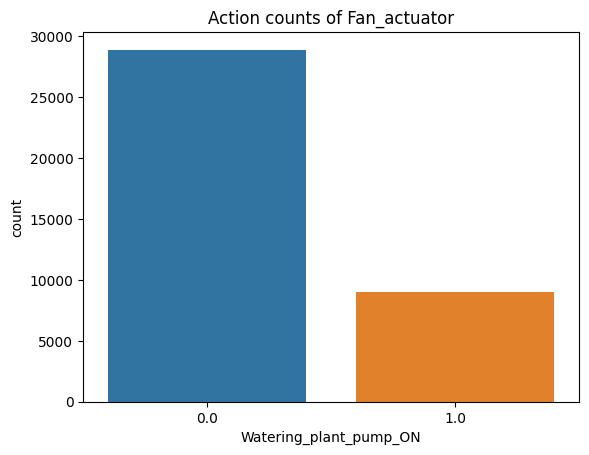

In [51]:
sns.countplot(x=df_irrigation_["Watering_plant_pump_ON"])
plt.title("Action counts of Fan_actuator")
plt.show()

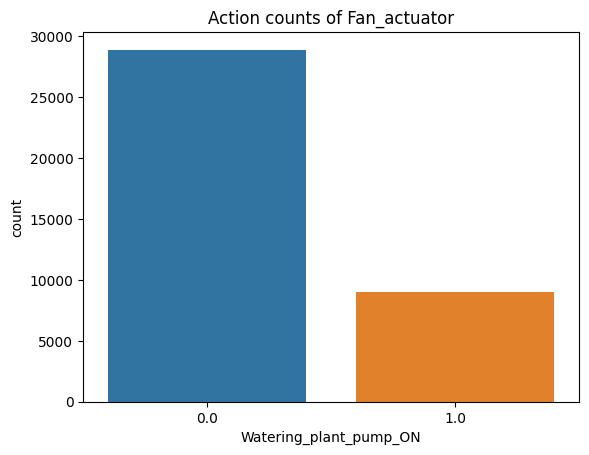

In [52]:
sns.countplot(x=df_irrigation_["Watering_plant_pump_ON"])
plt.title("Action counts of Fan_actuator")
plt.show()

### Modelos de Predição:

#### Model Water Pump Actuator

In [ ]:
# O SMOTE (Synthetic Minority Oversampling Technique) é uma técnica de aumento de dados utilizada para lidar com 
# conjuntos de dados desbalanceados, onde uma ou mais classes possuem significativamente menos exemplos do que as outras.

# O SMOTE funciona criando exemplos sintéticos da classe minoritária em vez de simplesmente replicar os exemplos existentes,
# como é feito na sobremostragem tradicional. Ele gera novos exemplos ao interpolar entre os exemplos existentes da 
# classe minoritária, criando pontos de dados que estão entre os exemplos reais.

In [53]:
x=df_irrigation_num
y=df_irrigation_[["Water_pump_actuator_ON"]]

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_sample, y_sample = smote.fit_resample(x, y)

print("Tamanhos originais:", x.shape, y.shape)
print("Tamanhos após SMOTE:", x_sample.shape, y_sample.shape)

Tamanhos originais: (37922, 6) (37922, 1)
Tamanhos após SMOTE: (58714, 6) (58714, 1)


In [55]:
y_sample

,Water_pump_actuator_ON
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
58709,1.0
58710,1.0
58711,1.0
58712,1.0


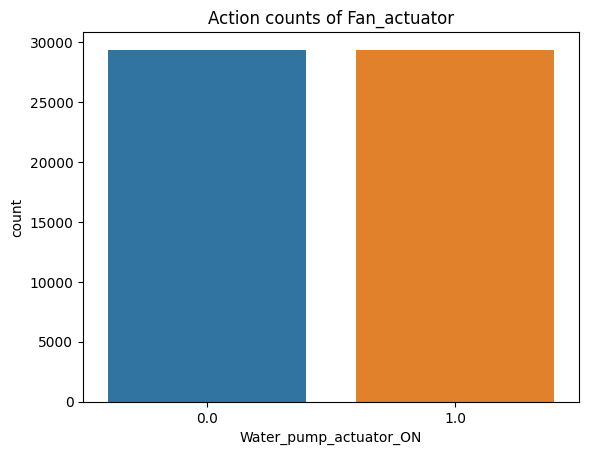

In [56]:
sns.countplot(x=y_sample["Water_pump_actuator_ON"])
plt.title("Action counts of Fan_actuator")
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=0)

**Regressão Logística**

In [58]:
from sklearn.linear_model import LogisticRegression
model_irrigation_lr=LogisticRegression()
model_irrigation_lr.fit(x_train,y_train)


LogisticRegression()

In [59]:
y_pred_lr = model_irrigation_lr.predict(x_test)

In [60]:
y_test

,Water_pump_actuator_ON
43164,1.0
2233,0.0
38778,1.0
19484,1.0
46846,1.0
...,...
13931,1.0
54910,1.0
36690,0.0
4373,0.0


In [61]:
data = { 'y_test': y_test.values.ravel(),  # ou y_test.values.flatten() --> converte o df em um vetor
         'y_pred_lr': y_pred_lr.ravel()    # ou y_pred_lr.flatten() --> converte o df em um vetor
}
    

df_irrigation_predictions = pd.DataFrame(data)
df_irrigation_predictions.head()

,y_test,y_pred_lr
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [63]:
# Acurácia
accuracy = accuracy_score(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_lr'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9849


In [64]:
data_acc={ 'Regressão Logística accuracy': [np.round(accuracy,4)*100]
    
}

df_irrigation_acc = pd.DataFrame(data_acc)
df_irrigation_acc

,Regressão Logística accuracy
0,98.49


In [65]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_lr'])
print(conf_matrix)

[[5824   84]
 [  93 5742]]


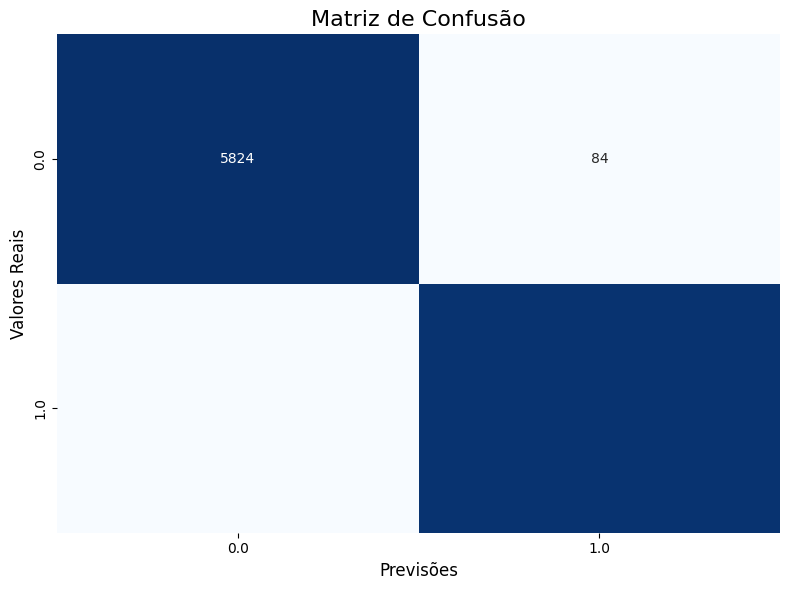

In [66]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_lr'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_irrigation_predictions['y_test'].values)), 
            yticklabels=list(set(df_irrigation_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [67]:

# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_lr']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      5908
         1.0       0.99      0.98      0.98      5835

    accuracy                           0.98     11743
   macro avg       0.98      0.98      0.98     11743
weighted avg       0.98      0.98      0.98     11743



**Arvore de decisão**

In [69]:
from random import seed
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(criterion='gini',max_depth= 3,splitter= 'best',random_state=42)
model_dtc.fit(x_sample,y_sample)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [70]:
x_sample.columns

Index(['tempreature', 'humidity', 'water_level', 'N', 'P', 'K'], dtype='object')

In [71]:
model_dtc.classes_

array([0., 1.])

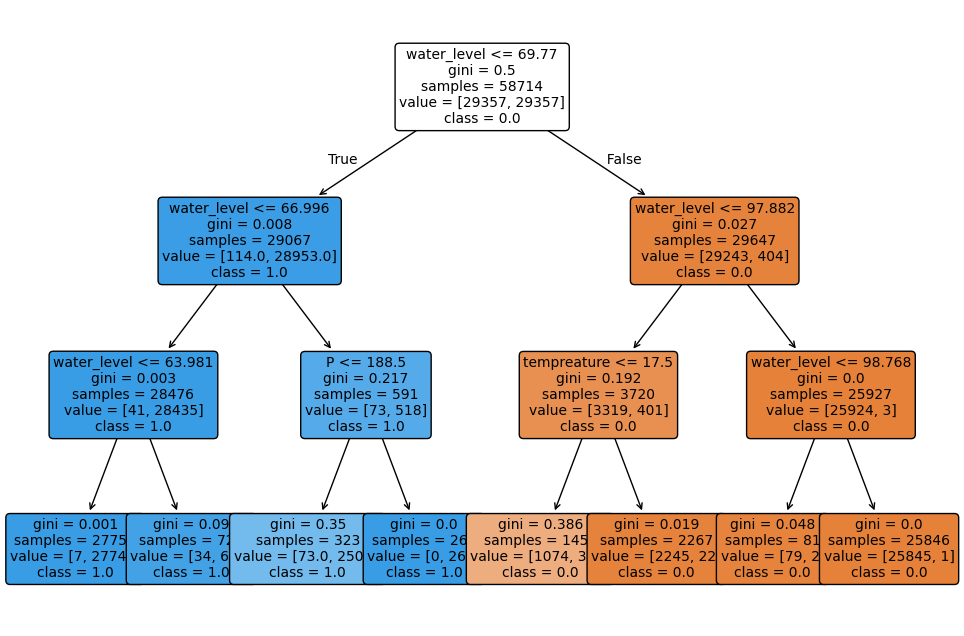

In [72]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Obtenha os nomes das classes
class_names = [str(i) for i in model_dtc.classes_]

# Plotando a árvore de decisão
plt.figure(figsize=(12, 8))  # Ajuste o tamanho da figura, se necessário
plot_tree(model_dtc, 
          feature_names=x_sample.columns,  # Se x_sample for um DataFrame
          class_names=class_names,  # Nomes das classes como strings
          filled=True,  # Colorir os nós
          rounded=True,  # Deixar os nós arredondados
          fontsize=10)  # Ajuste o tamanho da fonte
plt.show()

In [73]:
y_pred_dtc=model_dtc.predict(x_test)

In [74]:

df_irrigation_predictions['y_pred_dtc'] = y_pred_dtc.ravel() 
df_irrigation_predictions.head()

,y_test,y_pred_lr,y_pred_dtc
0,1.0,1.0,1.0
1,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [76]:
# Acurácia
accuracy = accuracy_score(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_dtc'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9915


In [77]:
df_irrigation_acc['Decision Tree Classifier accuracy'] =  np.round(accuracy,4)*100
df_irrigation_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy
0,98.49,99.15


In [78]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_dtc'])
print(conf_matrix)

[[5887   21]
 [  79 5756]]


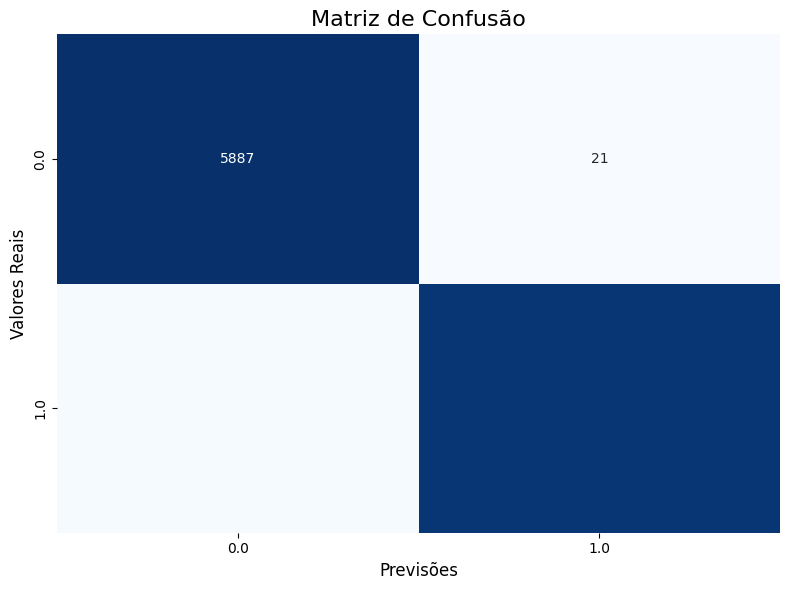

In [79]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_dtc'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_irrigation_predictions['y_test'].values)), 
            yticklabels=list(set(df_irrigation_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [80]:
# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_dtc']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5908
         1.0       1.00      0.99      0.99      5835

    accuracy                           0.99     11743
   macro avg       0.99      0.99      0.99     11743
weighted avg       0.99      0.99      0.99     11743



**Random Forest**

In [81]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(random_state=42)
model_rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

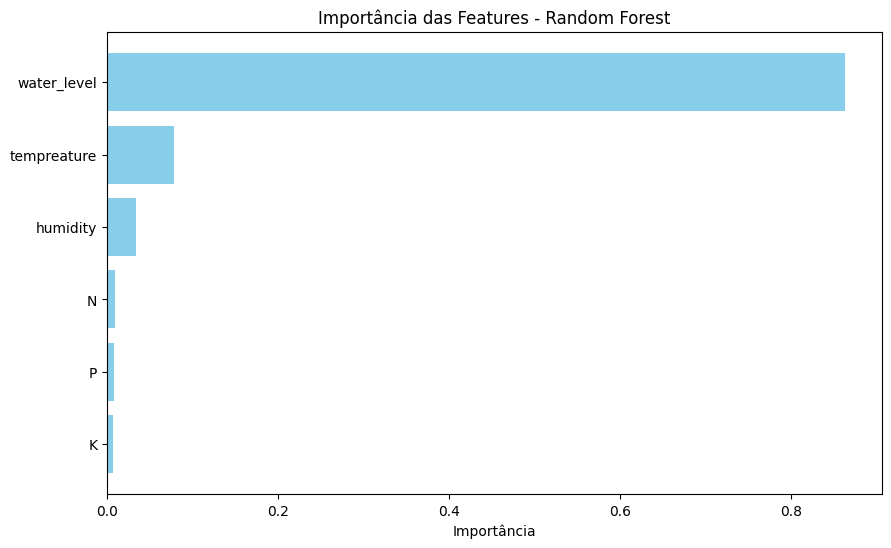

In [171]:
# Obtendo a importância das features
importancia_features = model_rfc.feature_importances_

# Criando um DataFrame para facilitar a visualização
df_importancia = pd.DataFrame({
    'Feature': x_train.columns,  # Supondo que X_train seja um DataFrame
    'Importância': importancia_features
})

# Ordenando as features pela importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Visualizando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Feature'], df_importancia['Importância'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()  # Inverter para mostrar a maior importância no topo
plt.show()

In [82]:
y_pred_rfc = model_rfc.predict(x_test)

In [ ]:
df_irrigation_predictions['y_pred_rfc'] = y_pred_rfc.ravel() 
df_irrigation_predictions.head()

,y_test,y_pred_lr,y_pred_dtc,y_pred_rfc
0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [85]:
# Acurácia
accuracy = accuracy_score(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_rfc'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9973


In [86]:
df_irrigation_acc['Random Forest Classifier accuracy'] =  np.round(accuracy,4)*100
df_irrigation_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy,Random Forest Classifier accuracy
0,98.49,99.15,99.73


In [87]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_rfc'])
print(conf_matrix)

[[5889   19]
 [  13 5822]]


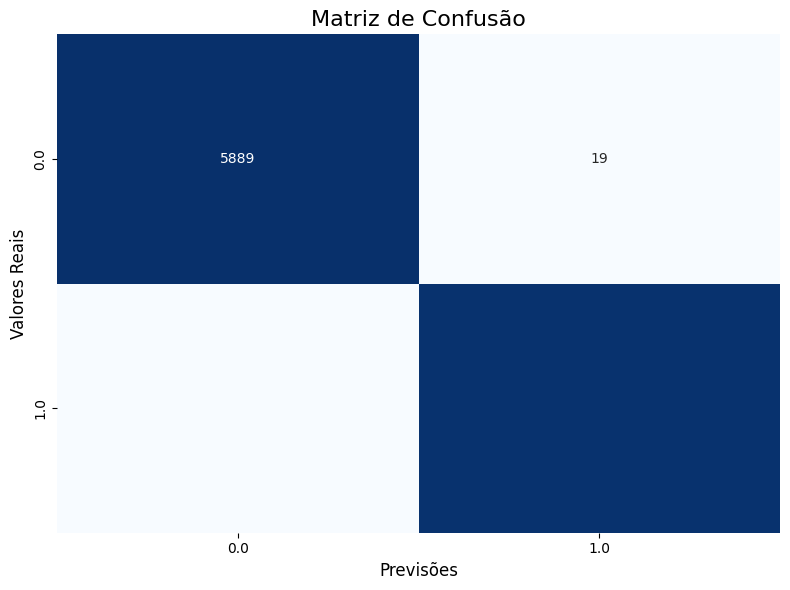

In [88]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_rfc'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_irrigation_predictions['y_test'].values)), 
            yticklabels=list(set(df_irrigation_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [89]:
# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_rfc']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5908
         1.0       1.00      1.00      1.00      5835

    accuracy                           1.00     11743
   macro avg       1.00      1.00      1.00     11743
weighted avg       1.00      1.00      1.00     11743



**XGBoost**

In [169]:
!pip install -q xgboost

In [90]:
y_train_ = y_train.astype('float')
y_test_ = y_test.astype('float')

In [91]:
import xgboost as xgb
xgbm = xgb.XGBClassifier(max_depth=50, random_state=42)
xgbm.fit(x_train, y_train_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [92]:
y_pred_xgbm = xgbm.predict(x_test)
y_pred_xgbm = y_pred_xgbm.astype('float')

In [93]:

df_irrigation_predictions['y_pred_xgbm'] = y_pred_xgbm.ravel() 
df_irrigation_predictions.head()

,y_test,y_pred_lr,y_pred_dtc,y_pred_rfc,y_pred_xgbm
0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [95]:
# Acurácia
accuracy = accuracy_score(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_xgbm'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9972


In [96]:
df_irrigation_acc['XGBoost Classifier accuracy'] =  np.round(accuracy,4)*100
df_irrigation_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy,Random Forest Classifier accuracy,XGBoost Classifier accuracy
0,98.49,99.15,99.73,99.72


In [97]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_xgbm'])
print(conf_matrix)

[[5885   23]
 [  10 5825]]


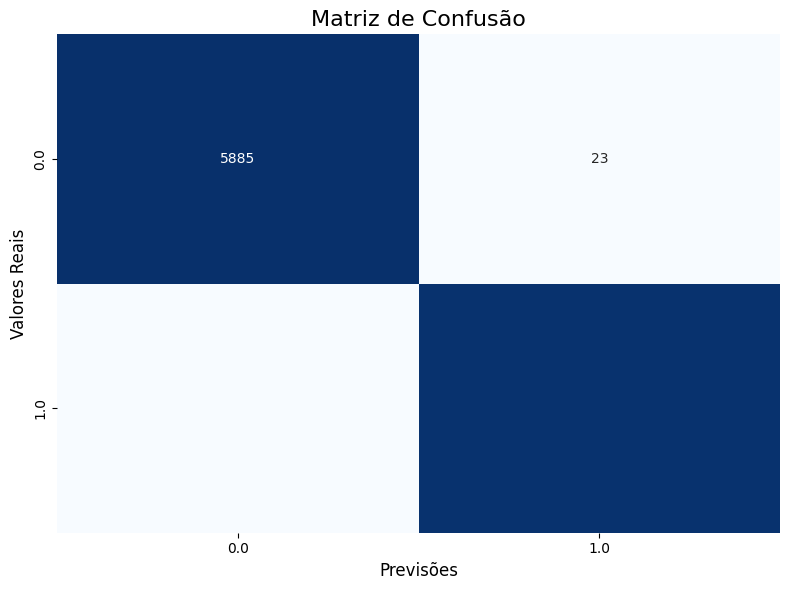

In [98]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_xgbm'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_irrigation_predictions['y_test'].values)), 
            yticklabels=list(set(df_irrigation_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [99]:

# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_xgbm']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5908
         1.0       1.00      1.00      1.00      5835

    accuracy                           1.00     11743
   macro avg       1.00      1.00      1.00     11743
weighted avg       1.00      1.00      1.00     11743



**Rede Neural**

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Construção da Rede Neural
model = Sequential()

# Camada de entrada (input layer) com 64 neurônios e função de ativação ReLU
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))

# Camada oculta com 32 neurônios e função de ativação ReLU
model.add(Dense(32, activation='relu'))

# Camada de saída (output layer) com o número de classes e função de ativação softmax
model.add(Dense(len(np.unique(y)), activation='softmax'))

# 3. Compilação do Modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [101]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,594 (10.13 KB)

 Trainable params: 2,594 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
import numpy as np
import tensorflow as tf
import random

# Definir semente para reprodutibilidade
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
# 4. Treinamento
history = model.fit(x_train, y_train_, epochs=30, batch_size=32, validation_data=(x_test, y_test_), verbose=1)

Epoch 1/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9518 - loss: 0.3467 - val_accuracy: 0.9654 - val_loss: 0.1042
Epoch 2/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - accuracy: 0.9782 - loss: 0.0760 - val_accuracy: 0.9636 - val_loss: 0.1110
Epoch 3/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0735 - val_accuracy: 0.9739 - val_loss: 0.0663
Epoch 4/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - accuracy: 0.9830 - loss: 0.0582 - val_accuracy: 0.9742 - val_loss: 0.0636
Epoch 5/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - accuracy: 0.9835 - loss: 0.0534 - val_accuracy: 0.9804 - val_loss: 0.0475
Epoch 6/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.9847 - loss: 0.0457 - val_accuracy: 0.9888 - val_loss: 0.0299
Epoch 7/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step - accuracy: 0.9859 - loss: 0.0397 - val_accuracy: 0.9888 - val_loss: 0.0295
Epoch 8/30
1468/1468 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.9864 - los

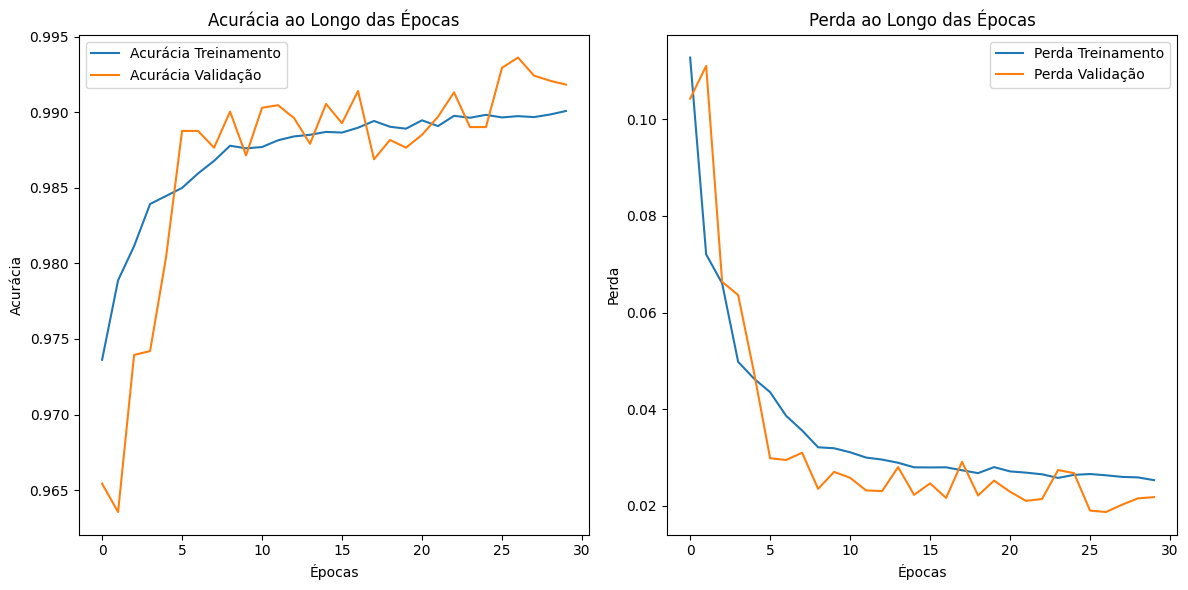

In [104]:
import matplotlib.pyplot as plt

# Gráfico de Acurácia
plt.figure(figsize=(12, 6))

# Plotando a acurácia de treino e de validação
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()


In [105]:
# 5. Avaliação
# Previsões no conjunto de teste
y_pred_rnn = np.argmax(model.predict(x_test), axis=1)
y_pred_rnn = y_pred_rnn.astype('float')

367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


In [106]:

df_irrigation_predictions['y_pred_rnn'] = y_pred_rnn.ravel() 
df_irrigation_predictions.head()

,y_test,y_pred_lr,y_pred_dtc,y_pred_rfc,y_pred_xgbm,y_pred_rnn
0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [108]:
# Acurácia
accuracy = accuracy_score(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_rnn'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9918


In [109]:
df_irrigation_acc['RNN accuracy'] =  np.round(accuracy,4)*100
df_irrigation_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy,Random Forest Classifier accuracy,XGBoost Classifier accuracy,RNN accuracy
0,98.49,99.15,99.73,99.72,99.18


In [110]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_rnn'])
print(conf_matrix)

[[5867   41]
 [  55 5780]]


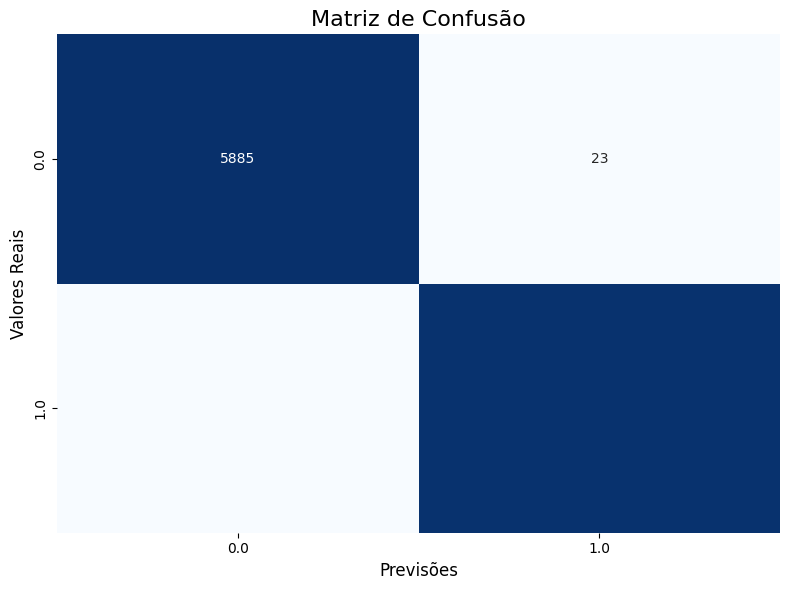

In [111]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_xgbm'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_irrigation_predictions['y_test'].values)), 
            yticklabels=list(set(df_irrigation_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [112]:
# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_irrigation_predictions['y_test'], df_irrigation_predictions['y_pred_rnn']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5908
         1.0       0.99      0.99      0.99      5835

    accuracy                           0.99     11743
   macro avg       0.99      0.99      0.99     11743
weighted avg       0.99      0.99      0.99     11743



**Benchmarking**

In [ ]:
df_irrigation_acc = df_irrigation_acc.T
df_irrigation_acc.sort_values(by=0,ascending=False, inplace=False)

In [125]:
df_irrigation_acc.sort_values(by=0,ascending=True, inplace=True)

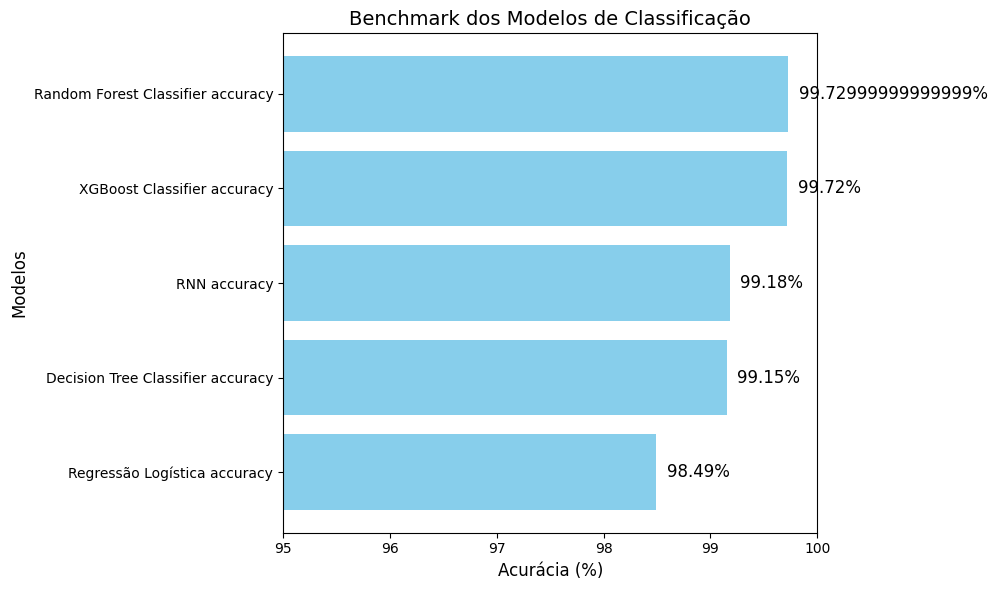

In [126]:
import matplotlib.pyplot as plt

# Dados
models = df_irrigation_acc.index.tolist()
accuracy = [x[0] for x in df_irrigation_acc.values.tolist()]

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracy, color='skyblue')

# Adicionando título e labels
plt.title('Benchmark dos Modelos de Classificação', fontsize=14)
plt.xlabel('Acurácia (%)', fontsize=12)
plt.ylabel('Modelos', fontsize=12)

# Adicionando as anotações no final das barras
for bar in bars:
    width = bar.get_width()  # largura da barra (valor da acurácia)
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width}%', va='center', fontsize=12)

# Exibindo o gráfico
plt.xlim(95, 100)  # Ajustando o limite do eixo X
plt.tight_layout()
plt.show()


In [129]:
import joblib

# Salvando o modelo treinado em um arquivo
joblib.dump(model_rfc, 'random_forest_model_irrigation.pkl')


['random_forest_model_irrigation.pkl']

In [130]:
# Carregando o modelo salvo
model_rfc_loaded = joblib.load('random_forest_model_irrigation.pkl')

# Agora você pode usar o modelo carregado para fazer previsões
predictions = model_rfc_loaded.predict(x_test)


In [140]:
x_t= x_test.iloc[0].values.reshape(1, -1)  
x_t

array([[ 27.        ,  64.85493666,  64.        , 183.        ,
        187.        , 158.        ]])

In [141]:
probabilidades = model_rfc_loaded.predict_proba(x_t)
probabilidades

array([[0.02215584, 0.97784416]])

In [144]:
p = probabilidades.tolist()
max_prob_indice = np.argmax(p[0])
max_prob= np.max(p[0])

print(max_prob_indice)
print(max_prob)

1
0.9778441558441557


In [149]:
def return_proba(probabilidades):
    p = probabilidades.tolist()
    max_prob_indice = np.argmax(p[0])
    max_prob= np.round(np.max(p[0]),4)*100
    return max_prob_indice, max_prob

In [150]:
max_prob_indice, max_prob= return_proba(probabilidades)
print(max_prob_indice)
print(max_prob)

1
97.78


#### Model FAN Actuator

In [153]:
df_irrigation_.columns

Index(['date', 'date_time', 'tempreature', 'humidity', 'water_level', 'N', 'P',
       'K', 'Fan_actuator_OFF', 'Fan_actuator_ON', 'Watering_plant_pump_OFF',
       'Watering_plant_pump_ON', 'Water_pump_actuator_OFF',
       'Water_pump_actuator_ON'],
      dtype='object')

In [154]:
x=df_irrigation_num
y=df_irrigation_["Fan_actuator_ON"]

In [155]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_sample, y_sample = smote.fit_resample(x, y)

print("Tamanhos originais:", x.shape, y.shape)
print("Tamanhos após SMOTE:", x_sample.shape, y_sample.shape)

Tamanhos originais: (37922, 6) (37922,)
Tamanhos após SMOTE: (52322, 6) (52322,)


In [156]:
y_sample

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
52317    1.0
52318    1.0
52319    1.0
52320    1.0
52321    1.0
Name: Fan_actuator_ON, Length: 52322, dtype: category
Categories (2, float64): [0.0, 1.0]

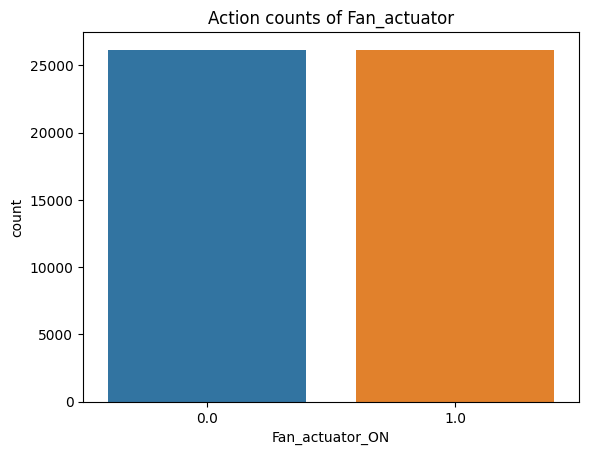

In [158]:
sns.countplot(x=y_sample)
plt.title("Action counts of Fan_actuator")
plt.show()

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=0)

**Regressão Logística**

In [160]:
from sklearn.linear_model import LogisticRegression
model_fan_lr=LogisticRegression()
model_fan_lr.fit(x_train,y_train)


LogisticRegression()

In [161]:
y_pred_lr = model_fan_lr.predict(x_test)

In [162]:
y_test

24836    0.0
28560    0.0
3696     1.0
18075    0.0
19395    0.0
        ... 
15477    0.0
6727     1.0
29747    0.0
27108    0.0
4043     1.0
Name: Fan_actuator_ON, Length: 10465, dtype: category
Categories (2, float64): [0.0, 1.0]

In [163]:
data = { 'y_test': y_test,  # ou y_test.values.flatten() --> converte o df em um vetor
         'y_pred_lr': y_pred_lr  # ou y_pred_lr.flatten() --> converte o df em um vetor
}
    

df_fan_predictions = pd.DataFrame(data)
df_fan_predictions.head()

,y_test,y_pred_lr
24836,0.0,0.0
28560,0.0,0.0
3696,1.0,1.0
18075,0.0,0.0
19395,0.0,0.0


In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [165]:
# Acurácia
accuracy = accuracy_score(df_fan_predictions['y_test'], df_fan_predictions['y_pred_lr'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9998


In [166]:
data_acc={ 'Regressão Logística accuracy': [np.round(accuracy,4)*100]
    
}

df_fan_acc = pd.DataFrame(data_acc)
df_fan_acc

,Regressão Logística accuracy
0,99.98


In [167]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_lr'])
print(conf_matrix)

[[5257    1]
 [   1 5206]]


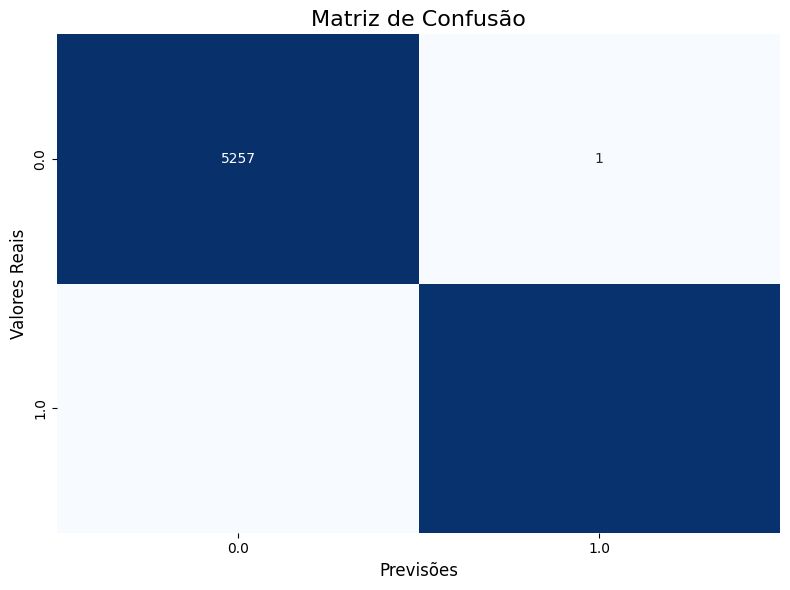

In [169]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_lr'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_fan_predictions['y_test'].values)), 
            yticklabels=list(set(df_fan_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [170]:

# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_fan_predictions['y_test'], df_fan_predictions['y_pred_lr']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5258
         1.0       1.00      1.00      1.00      5207

    accuracy                           1.00     10465
   macro avg       1.00      1.00      1.00     10465
weighted avg       1.00      1.00      1.00     10465



**Arvore de decisão**

In [172]:
from random import seed
from sklearn.tree import DecisionTreeClassifier
model_dtc=DecisionTreeClassifier(criterion='gini',max_depth= 3,splitter= 'best',random_state=42)
model_dtc.fit(x_sample,y_sample)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [173]:
x_sample.columns

Index(['tempreature', 'humidity', 'water_level', 'N', 'P', 'K'], dtype='object')

In [174]:
model_dtc.classes_

array([0., 1.])

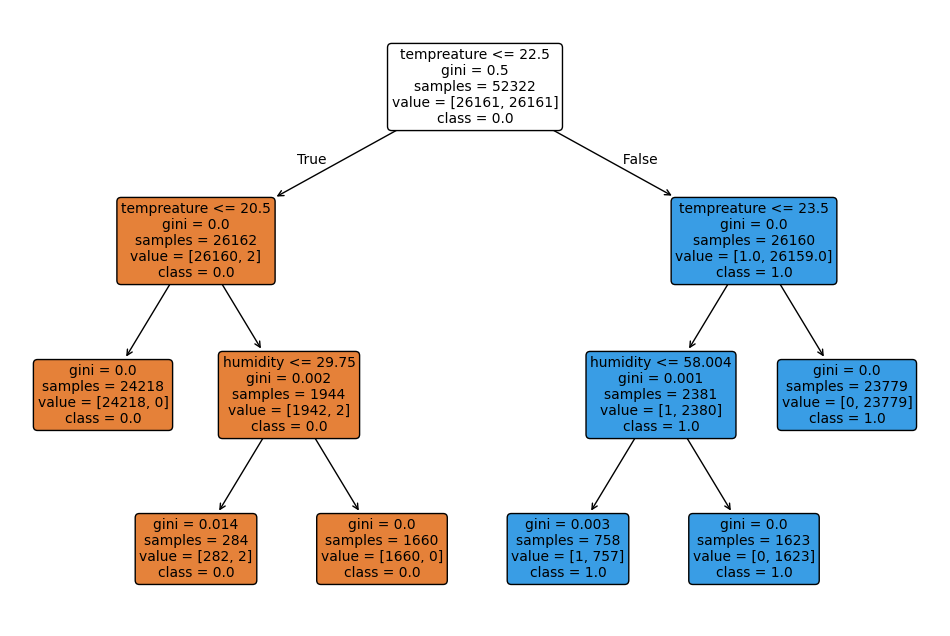

In [175]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Obtenha os nomes das classes
class_names = [str(i) for i in model_dtc.classes_]

# Plotando a árvore de decisão
plt.figure(figsize=(12, 8))  # Ajuste o tamanho da figura, se necessário
plot_tree(model_dtc, 
          feature_names=x_sample.columns,  # Se x_sample for um DataFrame
          class_names=class_names,  # Nomes das classes como strings
          filled=True,  # Colorir os nós
          rounded=True,  # Deixar os nós arredondados
          fontsize=10)  # Ajuste o tamanho da fonte
plt.show()

In [176]:
y_pred_dtc=model_dtc.predict(x_test)

In [179]:
df_fan_predictions['y_pred_dtc'] = y_pred_dtc
df_fan_predictions.head()

,y_test,y_pred_lr,y_pred_dtc
24836,0.0,0.0,0.0
28560,0.0,0.0,0.0
3696,1.0,1.0,1.0
18075,0.0,0.0,0.0
19395,0.0,0.0,0.0


In [180]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [181]:
# Acurácia
accuracy = accuracy_score(df_fan_predictions['y_test'], df_fan_predictions['y_pred_dtc'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9998


In [182]:
df_fan_acc['Decision Tree Classifier accuracy'] =  np.round(accuracy,4)*100
df_fan_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy
0,99.98,99.98


In [190]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_dtc'])
print(conf_matrix)

[[5257    1]
 [   1 5206]]


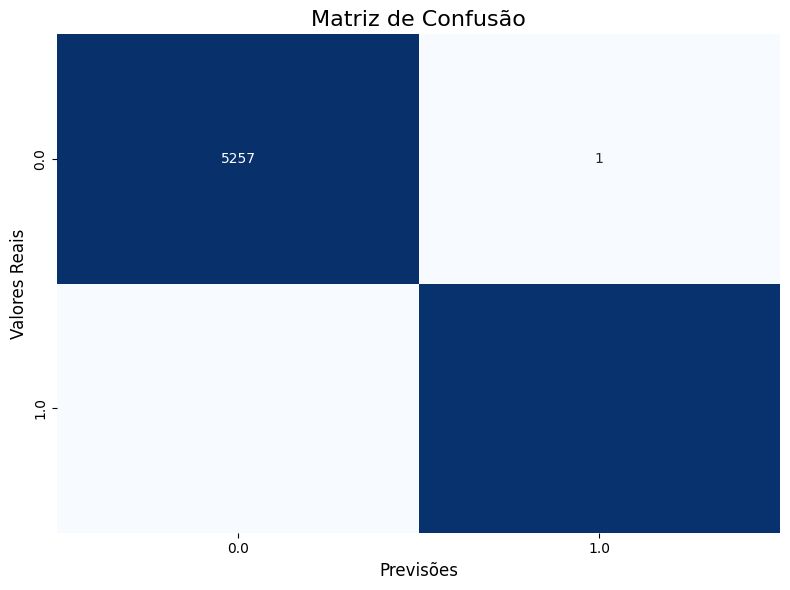

In [192]:
# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_fan_predictions['y_test'].values)), 
            yticklabels=list(set(df_fan_predictions['y_pred_dtc'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [194]:
# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_fan_predictions['y_test'], df_fan_predictions['y_pred_dtc']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5258
         1.0       1.00      1.00      1.00      5207

    accuracy                           1.00     10465
   macro avg       1.00      1.00      1.00     10465
weighted avg       1.00      1.00      1.00     10465



**Random Forest**

In [195]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier(random_state=42)
model_rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

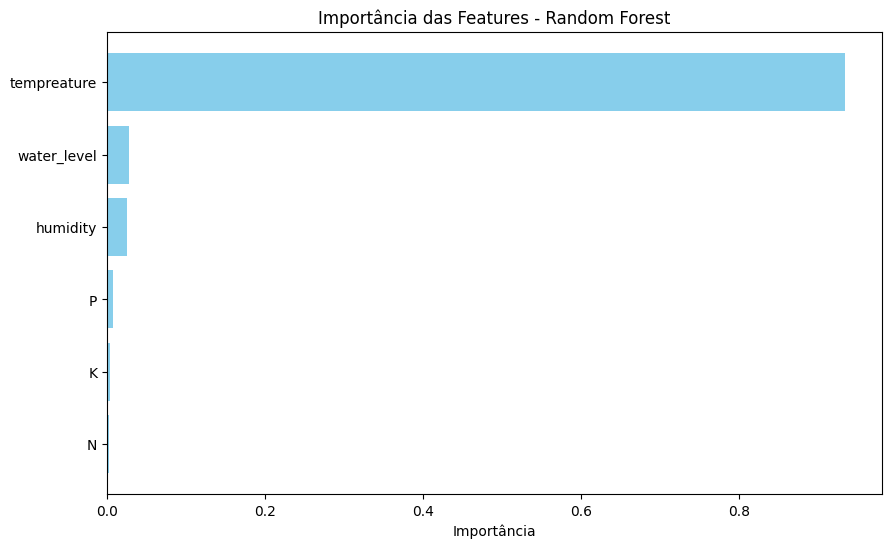

In [196]:
# Obtendo a importância das features
importancia_features = model_rfc.feature_importances_

# Criando um DataFrame para facilitar a visualização
df_importancia = pd.DataFrame({
    'Feature': x_train.columns,  # Supondo que X_train seja um DataFrame
    'Importância': importancia_features
})

# Ordenando as features pela importância
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Visualizando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Feature'], df_importancia['Importância'], color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()  # Inverter para mostrar a maior importância no topo
plt.show()

In [197]:
y_pred_rfc = model_rfc.predict(x_test)

In [198]:
df_fan_predictions['y_pred_rfc'] = y_pred_rfc.ravel() 
df_fan_predictions.head()

,y_test,y_pred_lr,y_pred_dtc,y_pred_rfc
24836,0.0,0.0,0.0,0.0
28560,0.0,0.0,0.0,0.0
3696,1.0,1.0,1.0,1.0
18075,0.0,0.0,0.0,0.0
19395,0.0,0.0,0.0,0.0


In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [200]:
# Acurácia
accuracy = accuracy_score(df_fan_predictions['y_test'], df_fan_predictions['y_pred_rfc'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9998


In [202]:
df_fan_acc['Random Forest Classifier accuracy'] =  np.round(accuracy,4)*100
df_fan_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy,Random Forest Classifier accuracy
0,99.98,99.98,99.98


In [204]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_rfc'])
print(conf_matrix)

[[5257    1]
 [   1 5206]]


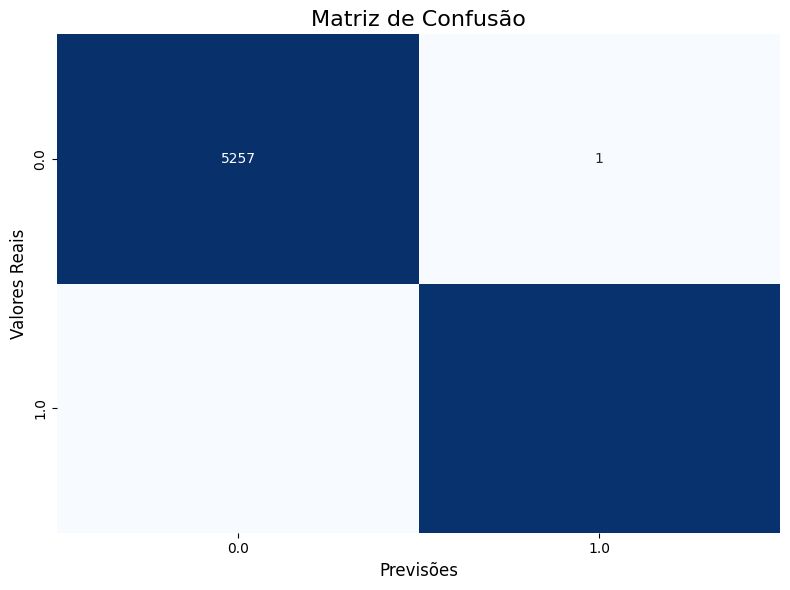

In [206]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_rfc'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_fan_predictions['y_test'].values)), 
            yticklabels=list(set(df_fan_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [207]:
# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_fan_predictions['y_test'], df_fan_predictions['y_pred_rfc']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5258
         1.0       1.00      1.00      1.00      5207

    accuracy                           1.00     10465
   macro avg       1.00      1.00      1.00     10465
weighted avg       1.00      1.00      1.00     10465



**XGBoost**

In [ ]:
!pip install -q xgboost

In [209]:
y_train_ = y_train.astype('float')
y_test_ = y_test.astype('float')

In [210]:
import xgboost as xgb
xgbm = xgb.XGBClassifier(max_depth=50, random_state=42)
xgbm.fit(x_train, y_train_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=50, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [211]:
y_pred_xgbm = xgbm.predict(x_test)
y_pred_xgbm = y_pred_xgbm.astype('float')

In [212]:

df_fan_predictions['y_pred_xgbm'] = y_pred_xgbm.ravel() 
df_fan_predictions.head()

,y_test,y_pred_lr,y_pred_dtc,y_pred_rfc,y_pred_xgbm
24836,0.0,0.0,0.0,0.0,0.0
28560,0.0,0.0,0.0,0.0,0.0
3696,1.0,1.0,1.0,1.0,1.0
18075,0.0,0.0,0.0,0.0,0.0
19395,0.0,0.0,0.0,0.0,0.0


In [213]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [214]:
# Acurácia
accuracy = accuracy_score(df_fan_predictions['y_test'], df_fan_predictions['y_pred_xgbm'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9998


In [215]:
df_fan_acc['XGBoost Classifier accuracy'] =  np.round(accuracy,4)*100
df_fan_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy,Random Forest Classifier accuracy,XGBoost Classifier accuracy
0,99.98,99.98,99.98,99.98


In [216]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_xgbm'])
print(conf_matrix)

[[5257    1]
 [   1 5206]]


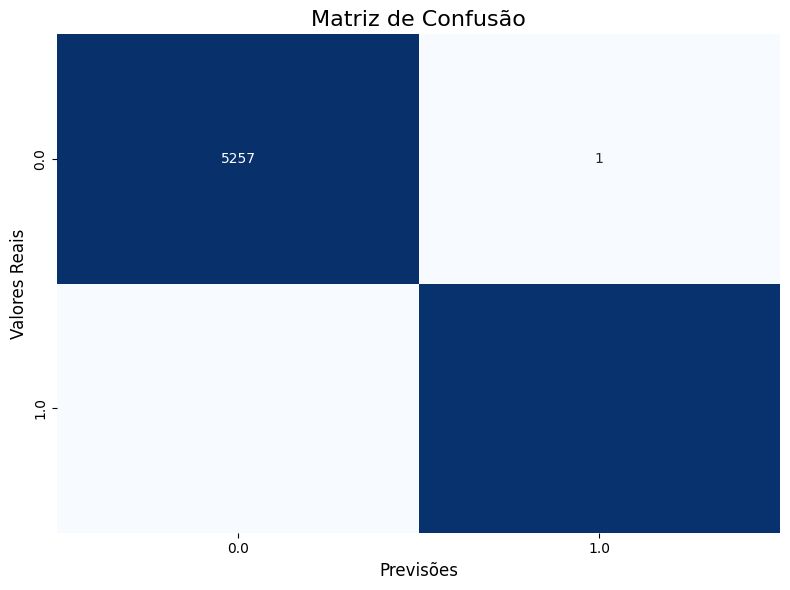

In [217]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_xgbm'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_fan_predictions['y_test'].values)), 
            yticklabels=list(set(df_fan_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [218]:

# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_fan_predictions['y_test'], df_fan_predictions['y_pred_xgbm']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5258
         1.0       1.00      1.00      1.00      5207

    accuracy                           1.00     10465
   macro avg       1.00      1.00      1.00     10465
weighted avg       1.00      1.00      1.00     10465



**Rede Neural**

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Construção da Rede Neural
model = Sequential()

# Camada de entrada (input layer) com 64 neurônios e função de ativação ReLU
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))

# Camada oculta com 32 neurônios e função de ativação ReLU
model.add(Dense(32, activation='relu'))

# Camada de saída (output layer) com o número de classes e função de ativação softmax
model.add(Dense(len(np.unique(y)), activation='softmax'))

# 3. Compilação do Modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [220]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,594 (10.13 KB)

 Trainable params: 2,594 (10.13 KB)

 Non-trainable params: 0 (0.00 B)

In [221]:
import numpy as np
import tensorflow as tf
import random

# Definir semente para reprodutibilidade
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [222]:
# 4. Treinamento
history = model.fit(x_train, y_train_, epochs=30, batch_size=32, validation_data=(x_test, y_test_), verbose=1)

Epoch 1/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8109 - loss: 1.6684 - val_accuracy: 0.9764 - val_loss: 0.0759
Epoch 2/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.9605 - loss: 0.0932 - val_accuracy: 0.9797 - val_loss: 0.0426
Epoch 3/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.9692 - loss: 0.0743 - val_accuracy: 0.9944 - val_loss: 0.0359
Epoch 4/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.9743 - loss: 0.0635 - val_accuracy: 0.9847 - val_loss: 0.0314
Epoch 5/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.9784 - loss: 0.0562 - val_accuracy: 0.9921 - val_loss: 0.0261
Epoch 6/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9804 - loss: 0.0524 - val_accuracy: 0.9970 - val_loss: 0.0258
Epoch 7/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.9820 - loss: 0.0477 - val_accuracy: 0.9946 - val_loss: 0.0229
Epoch 8/30
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.9836 - los

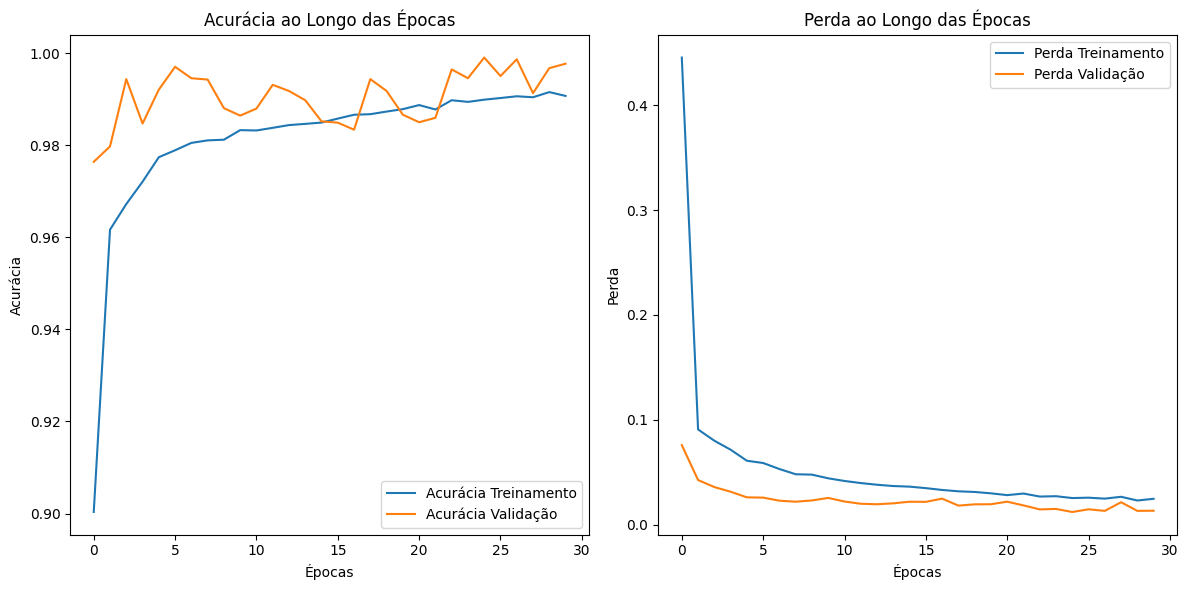

In [223]:
import matplotlib.pyplot as plt

# Gráfico de Acurácia
plt.figure(figsize=(12, 6))

# Plotando a acurácia de treino e de validação
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()


In [224]:
# 5. Avaliação
# Previsões no conjunto de teste
y_pred_rnn = np.argmax(model.predict(x_test), axis=1)
y_pred_rnn = y_pred_rnn.astype('float')

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step


In [225]:
df_fan_predictions['y_pred_rnn'] = y_pred_rnn.ravel() 
df_fan_predictions.head()

,y_test,y_pred_lr,y_pred_dtc,y_pred_rfc,y_pred_xgbm,y_pred_rnn
24836,0.0,0.0,0.0,0.0,0.0,0.0
28560,0.0,0.0,0.0,0.0,0.0,0.0
3696,1.0,1.0,1.0,1.0,1.0,1.0
18075,0.0,0.0,0.0,0.0,0.0,0.0
19395,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [227]:
# Acurácia
accuracy = accuracy_score(df_fan_predictions['y_test'], df_fan_predictions['y_pred_rnn'])
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.9977


In [228]:
df_fan_acc['RNN accuracy'] =  np.round(accuracy,4)*100
df_fan_acc

,Regressão Logística accuracy,Decision Tree Classifier accuracy,Random Forest Classifier accuracy,XGBoost Classifier accuracy,RNN accuracy
0,99.98,99.98,99.98,99.98,99.77


In [229]:
# Matriz de Confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_rnn'])
print(conf_matrix)

[[5254    4]
 [  20 5187]]


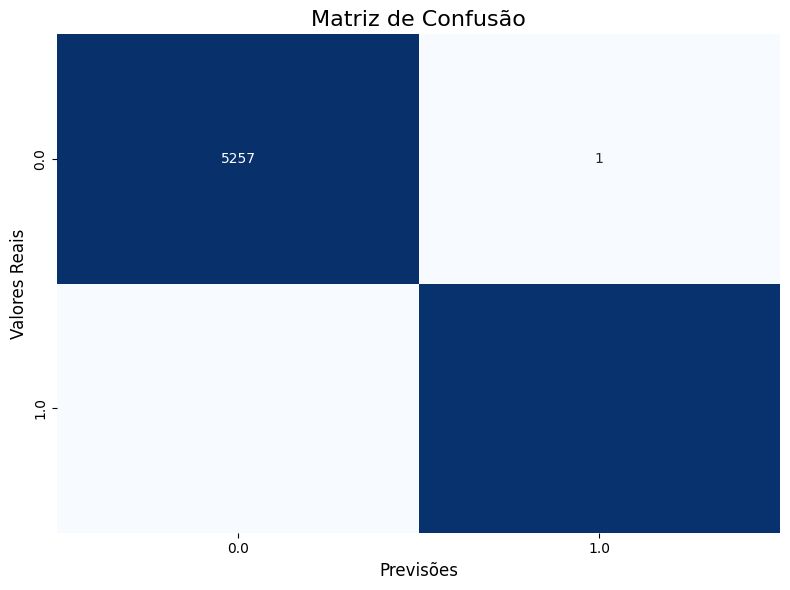

In [230]:
# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_fan_predictions['y_test'], df_fan_predictions['y_pred_xgbm'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=list(set(df_fan_predictions['y_test'].values)), 
            yticklabels=list(set(df_fan_predictions['y_test'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [231]:
# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(df_fan_predictions['y_test'], df_fan_predictions['y_pred_rnn']))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5258
         1.0       1.00      1.00      1.00      5207

    accuracy                           1.00     10465
   macro avg       1.00      1.00      1.00     10465
weighted avg       1.00      1.00      1.00     10465



**Benchmarking**

In [232]:
df_fan_acc = df_fan_acc.T
df_fan_acc.sort_values(by=0,ascending=False, inplace=False)

,0
Regressão Logística accuracy,99.98
Decision Tree Classifier accuracy,99.98
Random Forest Classifier accuracy,99.98
XGBoost Classifier accuracy,99.98
RNN accuracy,99.77


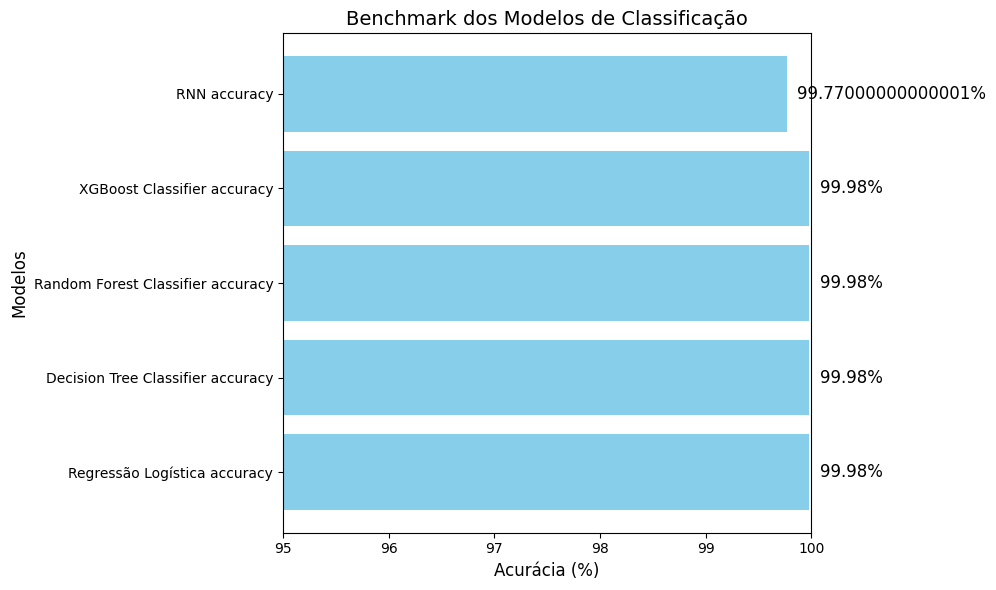

In [233]:
import matplotlib.pyplot as plt

# Dados
models = df_fan_acc.index.tolist()
accuracy = [x[0] for x in df_fan_acc.values.tolist()]

# Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracy, color='skyblue')

# Adicionando título e labels
plt.title('Benchmark dos Modelos de Classificação', fontsize=14)
plt.xlabel('Acurácia (%)', fontsize=12)
plt.ylabel('Modelos', fontsize=12)

# Adicionando as anotações no final das barras
for bar in bars:
    width = bar.get_width()  # largura da barra (valor da acurácia)
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width}%', va='center', fontsize=12)

# Exibindo o gráfico
plt.xlim(95, 100)  # Ajustando o limite do eixo X
plt.tight_layout()
plt.show()


In [234]:
import joblib

# Salvando o modelo treinado em um arquivo
joblib.dump(model_rfc, 'random_forest_model_fan.pkl')


['random_forest_model_fan.pkl']

In [235]:
# Carregando o modelo salvo
model_rfc_loaded = joblib.load('random_forest_model_fan.pkl')

# Agora você pode usar o modelo carregado para fazer previsões
predictions = model_rfc_loaded.predict(x_test)


In [236]:
x_t= x_test.iloc[0].values.reshape(1, -1)  
x_t

array([[ 14.,  60., 100., 178., 186., 157.]])

In [237]:
probabilidades = model_rfc_loaded.predict_proba(x_t)
probabilidades

array([[1., 0.]])

In [238]:
p = probabilidades.tolist()
max_prob_indice = np.argmax(p[0])
max_prob= np.max(p[0])

print(max_prob_indice)
print(max_prob)

0
1.0


In [239]:
def return_proba(probabilidades):
    p = probabilidades.tolist()
    max_prob_indice = np.argmax(p[0])
    max_prob= np.round(np.max(p[0]),4)*100
    return max_prob_indice, max_prob

In [240]:
max_prob_indice, max_prob= return_proba(probabilidades)
print(max_prob_indice)
print(max_prob)

0
100.0
